#Intoduction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pip install yfinance

In [3]:
import yfinance as yf

In [4]:
yf.pdr_override()

In [5]:
from pandas_datareader import data as wb

In [6]:
tickers= ['AAPL','AMZN','TSLA']

In [7]:
df= wb.DataReader(tickers,start='2020-1-1')['Adj Close']

[*********************100%***********************]  3 of 3 completed


In [8]:
df.head(2)

,AAPL,AMZN,TSLA
Date,,,
2020-01-02,73.449387,94.900497,28.684
2020-01-03,72.735313,93.748497,29.534


In [9]:
#Calculate Returns over each day
returns= df.pct_change()

In [10]:
returns.head(2)

,AAPL,AMZN,TSLA
Date,,,
2020-01-02,NaN,NaN,NaN
2020-01-03,-0.009722,-0.012139,0.029633


In [11]:
weights =np.array([0.25,.50,.25])

In [12]:
#Calculate Average Return for Each stock
meanDailyReturns = returns.mean()

In [13]:
#Calculate portfolio return
portReturn= np.sum(meanDailyReturns*weights)
print(portReturn)

0.0013576132548970398


In [14]:
#Calculating Daily portfolio Returns
returns['Portfolio']= returns.dot(weights)

In [15]:
returns.head(3)

,AAPL,AMZN,TSLA,Portfolio
Date,,,,
2020-01-02,NaN,NaN,NaN,NaN
2020-01-03,-0.009722,-0.012139,0.029633,-0.001092
2020-01-06,0.007968,0.014886,0.019255,0.014249


In [16]:
#Compound the percentage return over time
daily_cum_ret=(1+returns).cumprod()

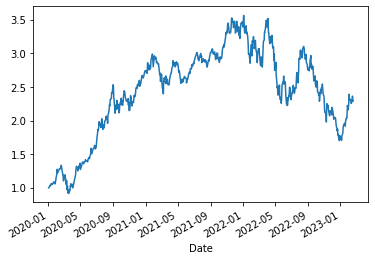

In [17]:
#plot your cumulative return
daily_cum_ret.Portfolio.plot()


#Measuring Risk of a Portfolio

In [18]:
#Daily Returns
daily_returns = df.pct_change()

In [21]:
#Construct a covarience matrix for the daily return data
cov_matrix = daily_returns.cov()*250
print(cov_matrix)

          AAPL      AMZN      TSLA
AAPL  0.132537  0.093020  0.136574
AMZN  0.093020  0.154044  0.131977
TSLA  0.136574  0.131977  0.521952


In [22]:
weights = np.array([0.5,0.3,0.2])

In [23]:
#Calculate the variance
port_var = np.dot(weights.T,np.dot(cov_matrix,weights))
print(port_var)


0.13893440787414796


In [25]:
#Converting Float into percentage
print(str(np.round(port_var,5)*100)+'%')

13.893%


In [26]:
#Standard deviation(risk of a portfolio)
port_stdv= np.sqrt(port_var)
print(str(np.round(port_stdv,5)*100)+'%')

37.274%


In [27]:
#Comments

# The standard deviation implies that if an investor invest in only 3 stocks (AAPL,AMZN,TSLA) then he is likely to endure 37.247% risk. 